In [791]:
import pandas as pd
import numpy as np
from ProjectUtils import LassoClass
from ProjectUtils import RidgeClass

## Import housing data and create df

In [792]:
df = pd.read_csv("House3.csv", names=["Y","X1","X2","X3","X4","X5"])[1:]
df = df.astype(float)

### Removing outliers

In [793]:
from scipy.stats import zscore
z_scores = zscore(df)
abs_z_scores =  np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [794]:
df.describe()

,Y,X1,X2,X3,X4,X5
count,1.370000e+03,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,4.880676e+05,51.822805,-10.331433,2.735766,1.807299,103.243796
std,2.908254e+05,5.818315,19.503032,1.017146,0.836148,43.702131
min,9.995000e+04,6.705378,-101.885162,1.000000,1.000000,1.000000
25%,2.950000e+05,53.281238,-6.339974,2.000000,1.000000,73.250000
50%,3.950000e+05,53.323845,-6.267481,3.000000,2.000000,104.000000
75%,5.800000e+05,53.368099,-6.186719,3.000000,2.000000,115.000000
max,2.150000e+06,55.952863,21.418868,7.000000,5.000000,319.000000


In [795]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [796]:
df_norm = normalize(df).reset_index()

In [797]:
df_norm

,index,Y,X1,X2,X3,X4,X5
0,1,0.219531,0.946472,0.775238,0.333333,0.25,0.336478
1,2,0.219531,0.947786,0.775629,0.333333,0.25,0.547170
2,3,0.073193,0.947692,0.775453,0.166667,0.00,0.160377
3,4,0.119534,0.923878,0.827138,0.333333,0.50,0.342767
4,5,0.109778,0.946811,0.775269,0.166667,0.00,0.226415
...,...,...,...,...,...,...,...
1365,1461,0.121948,0.946740,0.775007,0.166667,0.25,0.345912
1366,1462,0.073193,0.947943,0.775224,0.166667,0.25,0.273585
1367,1463,0.073169,0.946449,0.775177,0.166667,0.00,0.345912
1368,1464,0.158557,0.947877,0.774279,0.500000,0.50,0.433962


In [798]:
X_raw = np.column_stack((df_norm.X1,df_norm.X2,df_norm.X3,df_norm.X4,df_norm.X5))
y = df_norm.Y

In [799]:
X_raw

array([[0.94647172, 0.77523768, 0.33333333, 0.25      , 0.33647799],
       [0.94778558, 0.77562945, 0.33333333, 0.25      , 0.54716981],
       [0.94769157, 0.77545298, 0.16666667, 0.        , 0.16037736],
       ...,
       [0.94644873, 0.77517746, 0.16666667, 0.        , 0.34591195],
       [0.94787734, 0.77427871, 0.5       , 0.5       , 0.43396226],
       [0.94673711, 0.77540439, 0.33333333, 0.25      , 0.37421384]])

## Create testing and training sets

In [800]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2)

In [801]:
from sklearn.linear_model import LinearRegression

In [802]:
LinRegModel = LinearRegression()

In [803]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression Kfold check for MSE

In [804]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
r2_test = []
mean_error_train = []
std_error_train = []
r2_train = []

In [805]:
temp_test= []
temp_train = []
temp_r2_test = []
temp_r2_train = []
for train,test in kf.split(X_raw):
    LinRegModel.fit(X_raw[train],y[train])
    ypred = LinRegModel.predict(X_raw[test])
    ypred_train = LinRegModel.predict(X_raw[train])
    temp_test.append(mean_squared_error(y[test],ypred))
    temp_train.append(mean_squared_error(y[train],ypred_train))
    temp_r2_test.append(r2_score(ypred,y[test]))
    temp_r2_train.append(r2_score(ypred_train,y[train]))
mean_error.append(np.array(temp_test).mean())
std_error.append(np.array(temp_test).std())
r2_test.append(np.array(temp_r2_test).mean())
mean_error_train.append(np.array(temp_train).mean())
std_error_train.append(np.array(temp_train).mean())
r2_train.append(np.array(temp_r2_train).mean())

In [806]:
import matplotlib.pyplot as plt
print(min(mean_error), min(mean_error_train), max(r2_test))

0.008825182660840179 0.008777052477712353 0.2064849750703818


In [807]:
# fig = plt.figure(figsize=(9,4))
# plt.errorbar(range(5),mean_error, yerr=std_error, label="Test Data")
# plt.plot(range(5), mean_error_train, label="Training Data", c="orange")
# plt.xlabel("Values of $C$")
# plt.ylabel("Mean Squared Error")
# plt.title("Mean Squared Errors after 5-fold Cross Validation performed for various Lasso Models with different $C$")
# plt.legend()
# plt.show()
# fig.savefig("q2ci.png", bbox_inches="tight")

## Kfold Check for C in Lasso Models 

In [808]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
r2_test = []
mean_error_train = []
std_error_train = []
r2_train = []
C_list = np.linspace(0.001,1000,80)

In [809]:
for currC in C_list:
    currModel = LassoClass(currC)
    temp_test = []
    temp_train = []
    temp_r2_test = []
    temp_r2_train = []  
    for train,test in kf.split(X_raw):
        currModel.model.fit(X_raw[train],y[train])
        ypred = currModel.model.predict(X_raw[test])
        ypred_train = currModel.model.predict(X_raw[train])
        temp_test.append(mean_squared_error(y[test],ypred))
        temp_train.append(mean_squared_error(y[train],ypred_train))
        temp_r2_test.append(r2_score(ypred,y[test]))
        temp_r2_train.append(r2_score(ypred_train,y[train]))
    mean_error.append(np.array(temp_test).mean())
    std_error.append(np.array(temp_test).std())
    r2_test.append(np.array(temp_r2_test).mean())
    mean_error_train.append(np.array(temp_train).mean())
    std_error_train.append(np.array(temp_train).mean())
    r2_train.append(np.array(temp_r2_train).mean())

In [810]:
print(min(mean_error), min(mean_error_train), C_list[mean_error.index(min(mean_error))], max(r2_test))

0.008863932305603343 0.008819452538179093 1000.0 0.14243009194104703


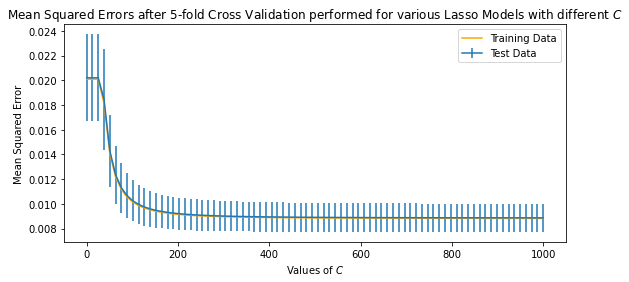

In [811]:
fig = plt.figure(figsize=(9,4))
plt.errorbar(C_list,mean_error, yerr=std_error, label="Test Data")
plt.plot(C_list,mean_error_train, label="Training Data", c="orange")
plt.xlabel("Values of $C$")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Errors after 5-fold Cross Validation performed for various Lasso Models with different $C$")
plt.legend()
plt.show()
fig.savefig("q2ci.png", bbox_inches="tight")


## Kfold for C in Ridge Models

In [812]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
mean_error_train = []
std_error_train = []
C_list = np.linspace(0.1,2,20)

In [813]:
for currC in C_list:
    currModel = RidgeClass(currC)
    temp_test = []
    temp_train = []
    for train,test in kf.split(X_raw):
        currModel.model.fit(X_raw[train],y[train])
        ypred = currModel.model.predict(X_raw[test])
        ypred_train = currModel.model.predict(X_raw[train])
        temp_test.append(mean_squared_error(y[test],ypred))
        temp_train.append(mean_squared_error(y[train],ypred_train))
    mean_error.append(np.array(temp_test).mean())
    std_error.append(np.array(temp_test).std())
    mean_error_train.append(np.array(temp_train).mean())
    std_error_train.append(np.array(temp_train).mean())

In [814]:
print(min(mean_error), min(mean_error_train), C_list[mean_error.index(min(mean_error))])

0.008827939596069343 0.008779515735985777 2.0


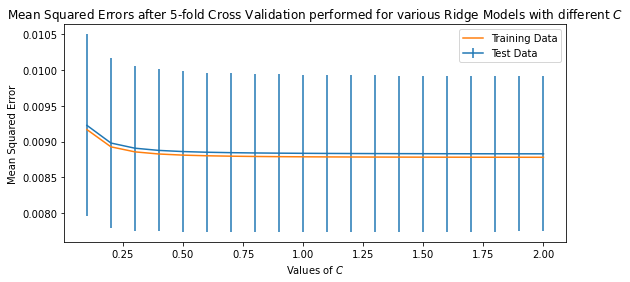

In [815]:
fig = plt.figure(figsize=(9,4))
plt.errorbar(C_list,mean_error, yerr=std_error, label="Test Data")
plt.plot(C_list,mean_error_train, label="Training Data")
plt.xlabel("Values of $C$")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Errors after 5-fold Cross Validation performed for various Ridge Models with different $C$")
plt.legend()
plt.show()
fig.savefig("q2a.png", bbox_inches="tight")

## Dummy Regressor (Mean Strategy)

In [816]:
from sklearn.dummy import DummyRegressor

In [817]:
dummyReg = DummyRegressor(strategy="mean")
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
mean_error_train = []
std_error_train = []
for train,test in kf.split(X_raw):
    dummyReg.fit(X_raw[train],y[train])
    ypred = dummyReg.predict(X_raw[test])
    ypred_train = dummyReg.predict(X_raw[train])
    temp_test.append(mean_squared_error(y[test],ypred))
    temp_train.append(mean_squared_error(y[train],ypred_train))
mean_error.append(np.array(temp_test).mean())
std_error.append(np.array(temp_test).std())
mean_error_train.append(np.array(temp_train).mean())
std_error_train.append(np.array(temp_train).mean())

In [818]:
print(min(mean_error), min(mean_error_train))

0.014515244730665039 0.014439782118432174
